# Project: Date-a-Scientist

In recent years, there has been a massive rise in the usage of dating apps to find love. Many of these apps use sophisticated data science techniques to recommend possible matches to users and to optimize the user experience. These apps give us access to a wealth of information that we've never had before about how different people experience romance.


In this capstone, you will analyze some data from OKCupid, an app that focuses on using multiple choice and short answers to match users.


The dataset provided has the following columns of multiple-choice data:

- age
- body_type
- diet
- drinks
- drugs
- education
- ethnicity
- height
- income
- job
- offspring
- orientation
- pets
- religion
- sex
- sign
- smokes
- speaks
- status

And a set of open short-answer responses to :

- essay0 - My self summary
- essay1 - What I’m doing with my life
- essay2 - I’m really good at
- essay3 - The first thing people usually notice about me
- essay4 - Favorite books, movies, show, music, and food
- essay5 - The six things I could never do without
- essay6 - I spend a lot of time thinking about
- essay7 - On a typical Friday night I am
- essay8 - The most private thing I am willing to admit
- essay9 - You should message me if…

### Load in the DataFrame


The data is stored in **profiles.csv**. We can start to work with it in **dating.py** by using Pandas, and then loading the csv into a DataFrame: 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

#Create your df here:
df = pd.read_csv("profiles.csv")

### Explore the Data


Let's make sure we understand what these columns represent!

For example, we were curious about `job`, so we called `.head()` on the column:

In [2]:
df.job.head()

0                 transportation
1           hospitality / travel
2                            NaN
3                        student
4    artistic / musical / writer
Name: job, dtype: object

You can also call `value_counts()` on a column to figure out what possible responses there are, and how many of each response there was.

In [3]:
df.job.value_counts()

other                                7589
student                              4882
science / tech / engineering         4848
computer / hardware / software       4709
artistic / musical / writer          4439
sales / marketing / biz dev          4391
medicine / health                    3680
education / academia                 3513
executive / management               2373
banking / financial / real estate    2266
entertainment / media                2250
law / legal services                 1381
hospitality / travel                 1364
construction / craftsmanship         1021
clerical / administrative             805
political / government                708
rather not say                        436
transportation                        366
unemployed                            273
retired                               250
military                              204
Name: job, dtype: int64

### Visualize some of the Data

We can start to build graphs from the data by first importing Matplotlib, then making some plots! For example, we were curious about the distribution of ages on the site, so we made a histogram of the `age` column:

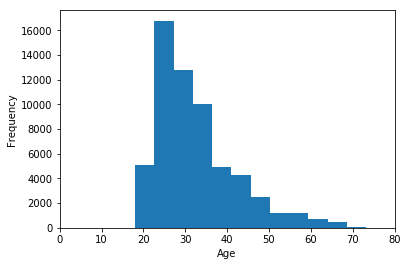

In [4]:
plt.hist(df.age, bins=20)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.xlim(0, 80)
plt.show()

We are also curious with the distribution of `income` in our samples

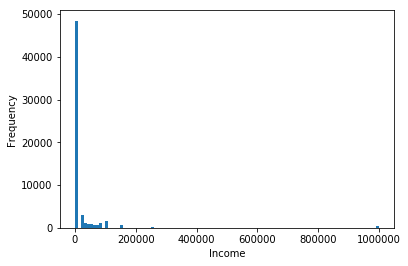

In [5]:
plt.hist(df.income, bins=100)
plt.xlabel("Income")
plt.ylabel("Frequency")
plt.show()

### Formulate a Question

We are interested to investigate the relation between `sex`, `education` level and `income`. Particularly, we would like to investigate if we are able to guess one's sex based on his/her education and income. 

In later stage, we would like to investigate if one's income is correlated to his/her length of essay and average word count in the essay.

### Augment the Data

In order to answer the question we've formulated, we will need to create some new columns in the DataFrame. This is especially true because so much of our data here is categorical (i.e. `diet` consists of the options `vegan`, `vegetarian`, `anything`, etc. instead of numerical values).

Categorical data is great to use as labels, but we want to create some numerical data as well to use for features.

For our questions above, we wanted to transform the `sex` column


In [6]:
df.sex.value_counts()

m    35829
f    24117
Name: sex, dtype: int64

into numerical data. We used:

In [7]:
sex_mapping = {"m": 0, "f": 1}

df["sex_code"] = df.sex.map(sex_mapping)

These lines of code created a new column called 'drinks_code' that mapped the following `drinks` values to these numbers:

| sex      | sex_code |
|----------|----------|
| male     | 0        |
| female   | 1        |


We did the same for `income`, and `education`. 

In [8]:
df.education.value_counts()

graduated from college/university    23959
graduated from masters program        8961
working on college/university         5712
working on masters program            1683
graduated from two-year college       1531
graduated from high school            1428
graduated from ph.d program           1272
graduated from law school             1122
working on two-year college           1074
dropped out of college/university      995
working on ph.d program                983
college/university                     801
graduated from space camp              657
dropped out of space camp              523
graduated from med school              446
working on space camp                  445
working on law school                  269
two-year college                       222
working on med school                  212
dropped out of two-year college        191
dropped out of masters program         140
masters program                        136
dropped out of ph.d program            127
dropped out

In [9]:
education_mapping = {}
index = 0

for education in df.education.unique():
    education_mapping[education] = index
    index += 1

df["education_code"] = df.education.map(education_mapping)

For further investigation on the correlation between income and length of essay, we also wanted some numerical data about the short answer essays. We combined them all into one string, took out the `NaN`s, and then created a new column called `essay_len`:

In [10]:
essay_cols = ["essay0","essay1","essay2","essay3","essay4","essay5","essay6","essay7","essay8","essay9"]

# Removing the NaNs
all_essays = df[essay_cols].replace(np.nan, '', regex=True)

# Combining the essays
all_essays = all_essays[essay_cols].apply(lambda x: ' '.join(x), axis=1)

# Compute the length of the essays
df["essay_len"] = all_essays.apply(lambda x: len(x))

We also created a column with `avg_word_length`

In [11]:
import string

# Filter the essay for punctuation
filtered_all_essays1 = all_essays.str.replace('<br />','')
filtered_all_essays2 = filtered_all_essays1.str.replace('\n','')

def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, ' ')
    return text

filtered_all_essays3 = filtered_all_essays2.apply(remove_punctuations)
# Filtered_all_essays3

def compute_avg_word(text):
    average = 0
    words = text.split()
    if len(words) != 0:
        average = sum(len(word) for word in words) / len(words)
    return average

df["avg_word_length"] = filtered_all_essays3.apply(compute_avg_word)
df.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,religion,sex,sign,smokes,speaks,status,sex_code,education_code,essay_len,avg_word_length
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,agnosticism and very serious about it,m,gemini,sometimes,english,single,0,0,2644,4.537559
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single,0,1,1453,4.127413
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available,0,2,5517,5.124246
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,NaN,m,pisces,no,"english, german (poorly)",single,0,0,477,5.333333
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,NaN,m,aquarius,no,english,single,0,3,725,4.970874


### Normalize the Data

In order to get accurate results, we should make sure our numerical data all has the same weight.

In [12]:
from sklearn.preprocessing import MinMaxScaler

feature_data = df[['sex_code', 'education_code', 'income', 'essay_len', 'avg_word_length']]

x = feature_data.values
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)

feature_data = pd.DataFrame(x_scaled, columns=feature_data.columns)
feature_data.head()

,sex_code,education_code,income,essay_len,avg_word_length
0,0.0,0.00000,0.000000,0.027372,0.010145
1,0.0,0.03125,0.080001,0.015000,0.009228
2,0.0,0.06250,0.000000,0.057215,0.011457
3,0.0,0.00000,0.020001,0.004861,0.011925
4,0.0,0.09375,0.000000,0.007438,0.011114


### Use Classification Techniques

In this section, we would use **K-Nearest Neighbor** classification to predict one's `sex` based on `education` level and `income`.

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

#predicting sex with education level and income using KNN
featuresKNN = df[['education_code', 'income']]
labelsKNN = df['sex_code']

featuresKNN_train, featuresKNN_test, labelsKNN_train, labelsKNN_test = train_test_split(featuresKNN, labelsKNN, train_size=0.8, test_size=0.2, random_state = 6)


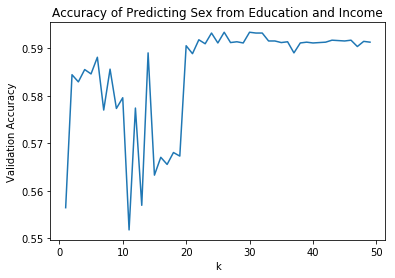

In [14]:
#find the number of neighbors k that gives the best accuracy
k_list = range(1,50,1)
accuracies = []
for k in k_list:
  classifier = KNeighborsClassifier(k)
  classifier.fit(featuresKNN_train, labelsKNN_train)
  accuracies.append(classifier.score(featuresKNN_test, labelsKNN_test))

plt.plot(k_list, accuracies)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.title("Accuracy of Predicting Sex from Education and Income")
plt.show()

In [15]:
#based on the plot, it seems like k = 30 gives the best fit. Hence,
classifierKNN = KNeighborsClassifier(30)
classifierKNN.fit(featuresKNN_train, labelsKNN_train)
print("The score of predicting Sex based on Education and Income using KNN at k = 30 is: {0}".format(classifierKNN.score(featuresKNN_test, labelsKNN_test)))

#print(classifierKNN.predict(featuresKNN_test))
#print(labelsKNN_test.get_values())

from sklearn.metrics import accuracy_score, recall_score, precision_score
print("The accuracy score is: {0}".format(accuracy_score(labelsKNN_test.get_values(), classifierKNN.predict(featuresKNN_test))))
print("The recall score is: {0}".format(recall_score(labelsKNN_test.get_values(), classifierKNN.predict(featuresKNN_test))))
print("The precision score is: {0}".format(precision_score(labelsKNN_test.get_values(), classifierKNN.predict(featuresKNN_test))))


The score of predicting Sex based on Education and Income using KNN at k = 30 is: 0.5933277731442869
The accuracy score is: 0.5933277731442869
The recall score is: 0.2738813735691987
The precision score is: 0.486866444691084


We shall now attempt to predict one's `sex` based on `education` level and `income` using **Naive Bayes** classification.

In [16]:
from sklearn.naive_bayes import MultinomialNB

#predicting sex with education level and income using SVC
classifierNB = MultinomialNB()
classifierNB.fit(featuresKNN_train, labelsKNN_train)
print("The score of predicting Sex based on Education and Income using Naive Bayes classification is: {0}".format(classifierNB.score(featuresKNN_test, labelsKNN_test)))


ValueError: Input X must be non-negative

### Use Regression Techniques


In this section, we would like to predict one's `income` based on `essay_len` and `avg_word_length` using **Linear Regression**.


In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score

#predicting income based on essay length and average word counts using Linear Regression
featuresLR = df[['essay_len', 'avg_word_length']]
labelsLR = df['income']

featuresLR_train, featuresLR_test, labelsLR_train, labelsLR_test = train_test_split(featuresLR, labelsLR, train_size=0.8, test_size=0.2, random_state = 6)


In [18]:
regression = LinearRegression()
regression.fit(featuresLR_train, labelsLR_train)
print("The score of predicting Income based on Essay Length and Average Word Count using Linear Regression is: {0}".format(regression.score(featuresLR_test, labelsLR_test)))


The score of predicting Income based on Essay Length and Average Word Count using Linear Regression is: 0.00017389195956907244


We shall now attempt to predict one's `income` based on `essay_len` and `avg_word_length using **KNN Regressor**.

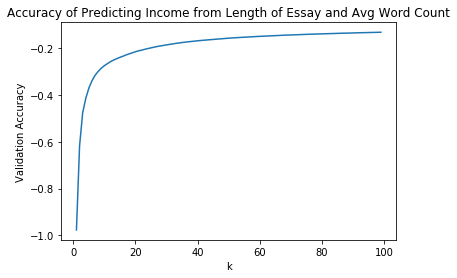

In [19]:
from sklearn.neighbors import KNeighborsRegressor

#find the number of neighbors k that gives the best accuracy
k_list2 = range(1,100,1)
accuracies2 = []
for k in k_list2:
  regressor = KNeighborsRegressor(n_neighbors = k, weights = "distance")
  regressor.fit(featuresLR_train, labelsLR_train)
  accuracies2.append(regressor.score(featuresLR_test, labelsLR_test))

plt.plot(k_list2, accuracies2)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.title("Accuracy of Predicting Income from Length of Essay and Avg Word Count")
plt.show()

In [20]:
#predicting income based on essay length and average word counts using KNN Regressor 
#based on the plot, it seems like k = 40 gives the best fit. Hence,

regressor = KNeighborsRegressor(n_neighbors = 40, weights = "distance")
regressor.fit(featuresLR_train, labelsLR_train)
print("The score of predicting Income based on Essay Length and Average Word Count using KNN Regressor is: {0}".format(regressor.score(featuresLR_test, labelsLR_test)))


The score of predicting Income based on Essay Length and Average Word Count using KNN Regressor is: -0.1673559022908513
